# Bikeshare数据集上的数据探索

1、	任务描述
请在Capital Bikeshare （美国Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。根据每天的天气信息，预测该天的单车共享骑行量。

原始数据集地址：http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
1)	文件说明
day.csv: 按天计的单车共享次数（作业只需使用该文件）
hour.csv: 按小时计的单车共享次数（无需理会）
readme：数据说明文件

2)	字段说明
- Instant记录号
- Dteday：日期
- Season：季节（1=春天、2=夏天、3=秋天、4=冬天）
- yr：年份，(0: 2011, 1:2012)
- mnth：月份( 1 to 12)
- hr：小时 (0 to 23)  （只在hour.csv有，作业忽略此字段）
- holiday：是否是节假日
- weekday：星期中的哪天，取值为0～6
- workingday：是否工作日
- 1=工作日 （是否为工作日，1为工作日，0为非周末或节假日
- weathersit：天气（1：晴天，多云；2：雾天，阴天；3：小雪，小雨；4：大雨，大雪，大雾）
- temp：气温摄氏度
- atemp：体感温度
- hum：湿度
- windspeed：风速
- casual：非注册用户个数
- registered：注册用户个数
- cnt：给定日期（天）时间（每小时）总租车人数，响应变量y （cnt = casual + registered）

casual、registered和cnt三个特征均为要预测的y，作业里只需对cnt进行预测

## 导入必要的工具包

In [1]:
# 数据读取及基本处理
import pandas as pd
import numpy as np

# plotting
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sn.set_style('whitegrid')
sn.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

# pandas display data frames as tables
from IPython.display import display, HTML

## 读入数据

In [3]:
# 读入数据
train = pd.read_csv("E:\my work\Bikeshare\day.csv")
print("train : " + str(train.shape))
train.head()

train : (731, 16)


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


没有缺失数据

## 1.数据探索

In [4]:
#对数据值型特征，用常用统计量观察其分布
train.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

### 1. 离散特征的分布

In [5]:
#对类别型特征，观察其取值范围及直方图
categorical_features = ['season','mnth','weathersit','weekday']
for col in categorical_features:
    print '\n%s属性的不同取值和出现的次数'%col
    print train[col].value_counts()
    train[col] = train[col].astype('object')


season属性的不同取值和出现的次数
3    188
2    184
1    181
4    178
Name: season, dtype: int64

mnth属性的不同取值和出现的次数
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

weathersit属性的不同取值和出现的次数
1    463
2    247
3     21
Name: weathersit, dtype: int64

weekday属性的不同取值和出现的次数
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64


类别型特征的取值不多
类别型特征可以采用独热编码（One hot encoding）/哑编码

### 2. 数值特征的分布

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000282E56BB2E8>,
      dtype=object)

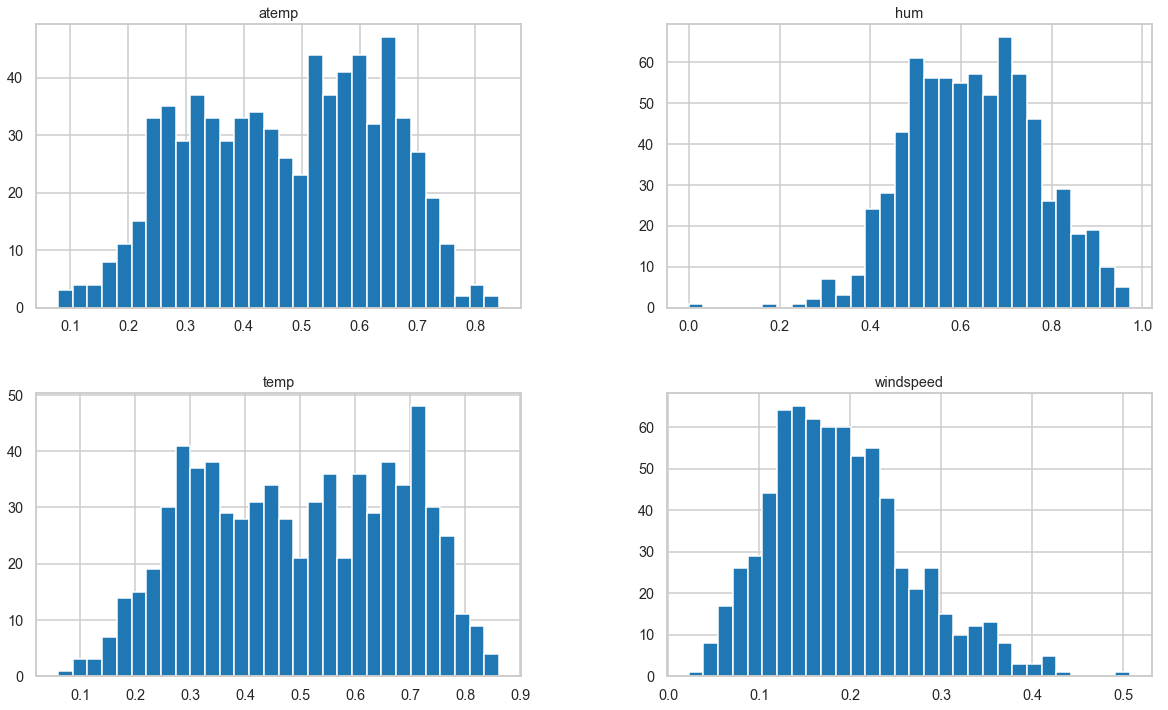

In [8]:
#对数值型特征，直方图
numerical_features = ['temp','atemp','hum','windspeed']
train[numerical_features].hist(figsize=(20, 12), bins=30)

### 3. 特征与目标之间的关系

#### 3.1 每年骑行量的分布
violinplot中用x表示类别（年）信息

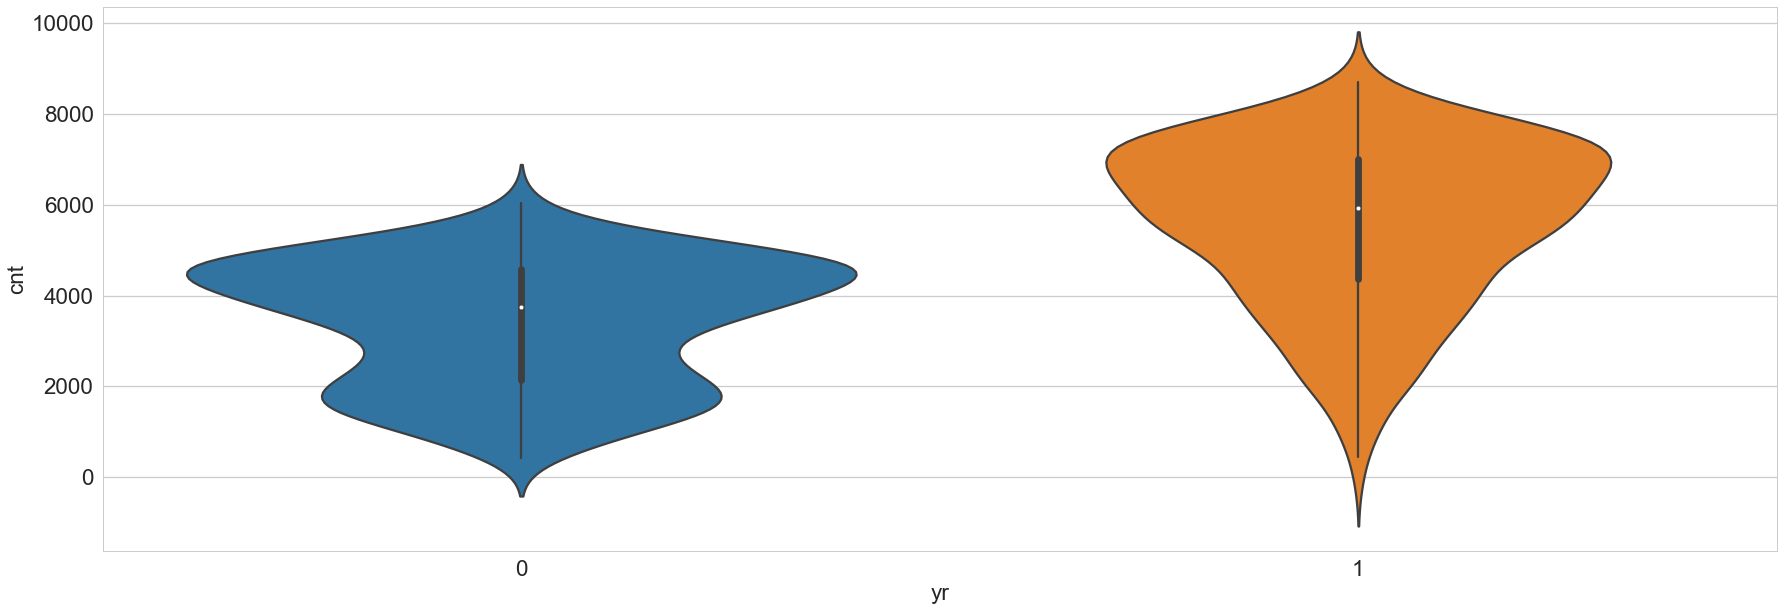

In [14]:
sn.violinplot(data=train[['yr', 'cnt']], x="yr",y="cnt")

2011年和2012年的分布差异很大

#### 3.2 一年中每天的骑车量
用颜色参数hue表示类别（年）信息

[Text(0.5, 1.0, 'dayly distribution of counts')]

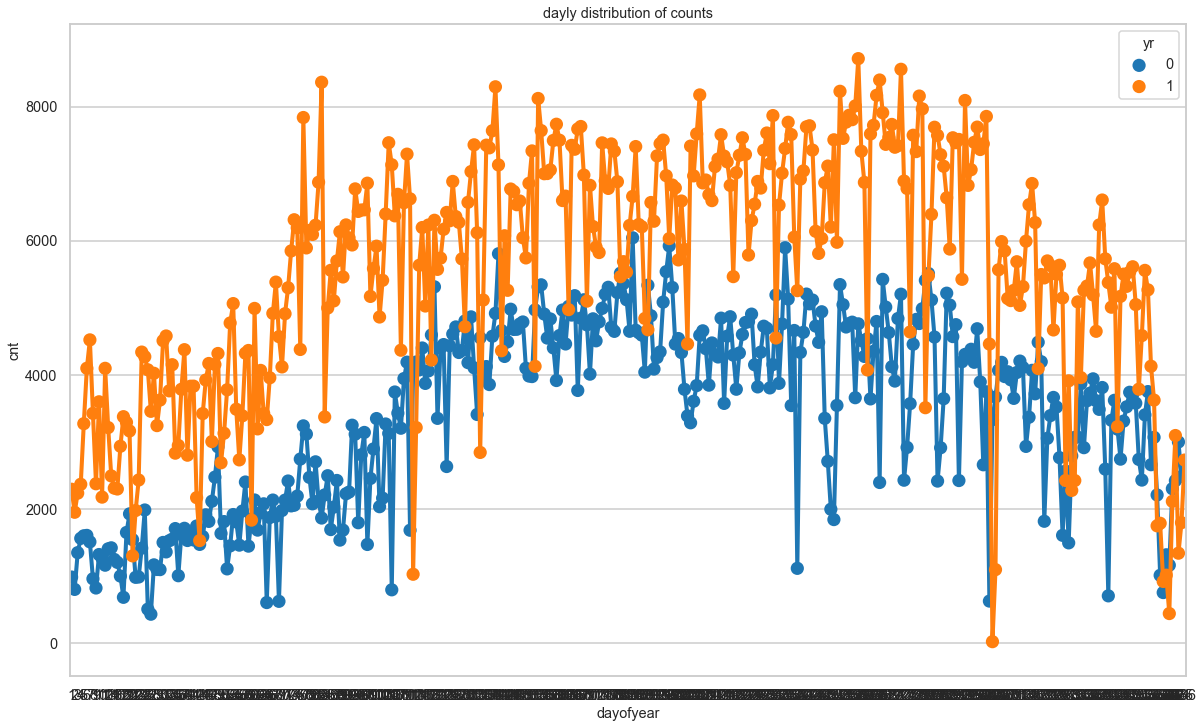

In [15]:
import datetime

train['date'] = pd.to_datetime(train['dteday'])
train['dayofyear'] = train["date"].dt.dayofyear  #减今年的第几天

fig,ax = plt.subplots(figsize=(20, 12))
sn.pointplot(data=train[['dayofyear', 'cnt', 'yr']], x='dayofyear', y='cnt', hue='yr',ax=ax)
ax.set(title="dayly distribution of counts")


每年开始和结束的数量少，中间多，骑行量和季节/月份有关

#### 3.3 季节与骑车数量的关系
violinplot得到详细分布

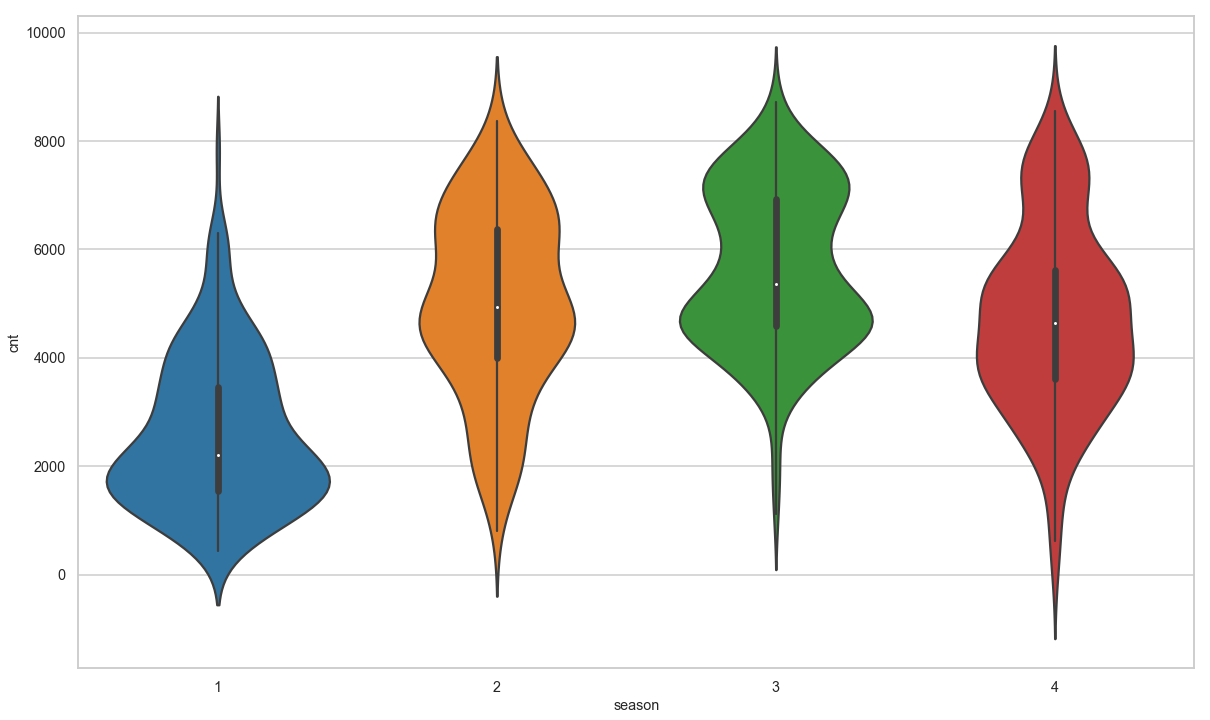

In [18]:
fig, ax = plt.subplots(figsize=(20, 12))
sn.violinplot(data=train[['season', 'cnt']], x="season", y="cnt")

能看出来每个季节骑行量的分布不同
barplot利用矩阵条的高度反映数值变量的集中趋势，以及使用errorbar功能（差棒图）来估计变量之间的差值统计。
谨记barplot展示的是某种变量分布的平均值

[Text(0.5, 1.0, 'Seasonly distribution of counts')]

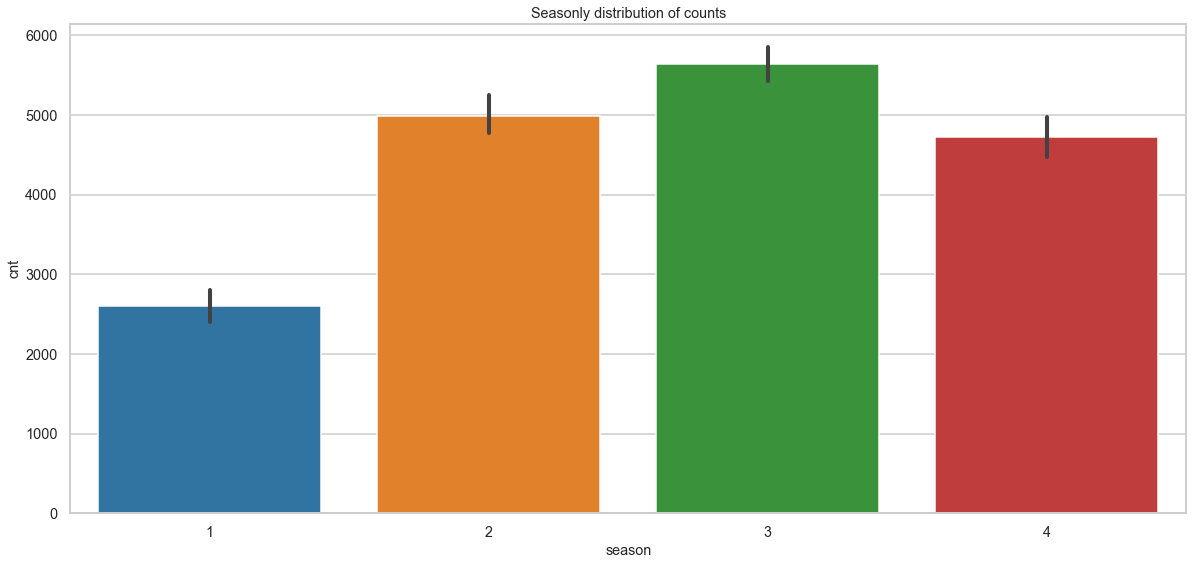

In [22]:
fig, ax = plt.subplots(figsize=(20, 9))
sn.barplot(data=train[['season', 'cnt']], x="season", y="cnt")
ax.set(title="Seasonly distribution of counts")

骑行量和季节的关系就很明显了：第2、3、4季度的骑行量明显高于第1季度

#### 3.4 月份与骑车数量的关系

[Text(0.5,1,u'Monthly distribution of counts')]

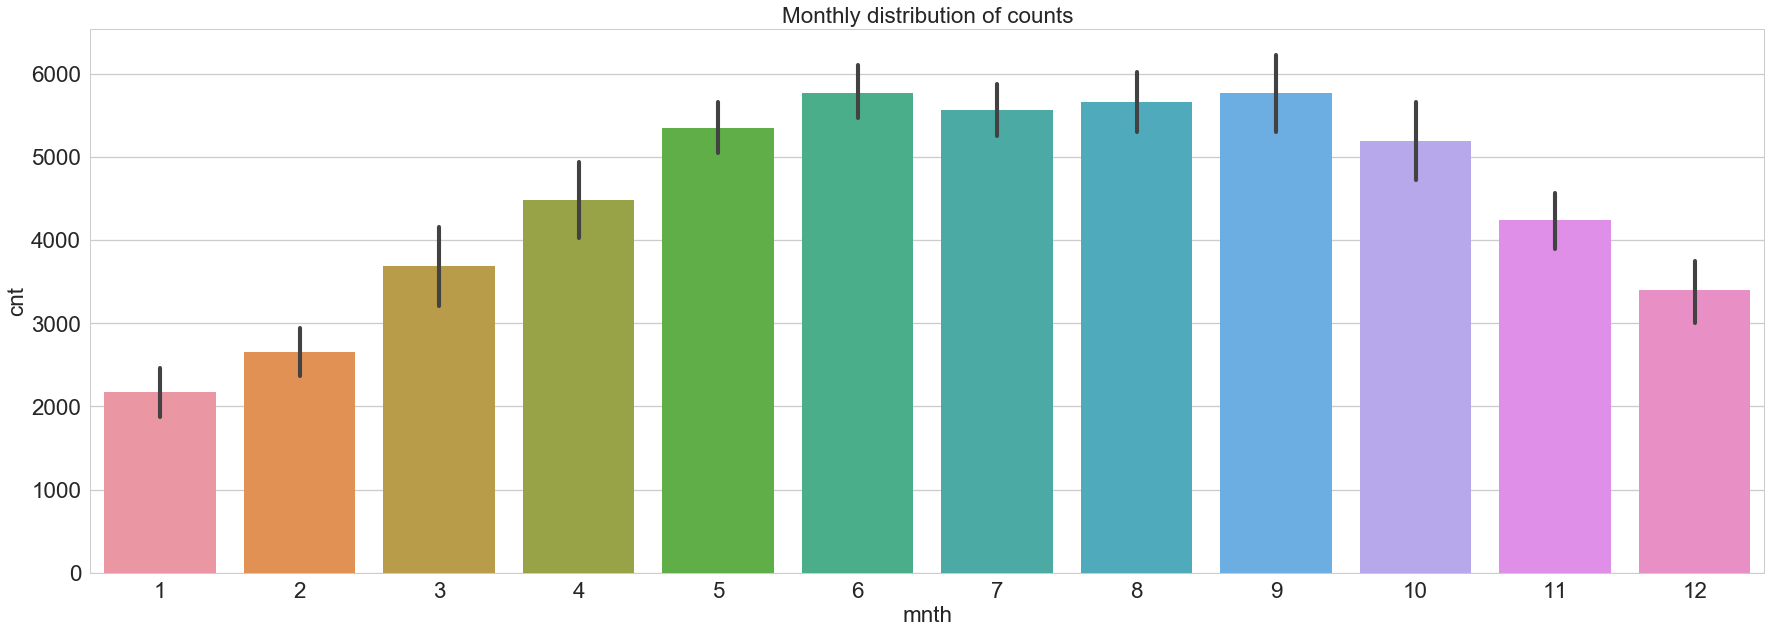

In [11]:
fig,ax = plt.subplots()
sn.barplot(data=train[['mnth', 'cnt']], x="mnth", y="cnt")
ax.set(title="Monthly distribution of counts")

#### 3.5 天气和骑车数目的关系

[Text(0.5, 1.0, 'weathersit distribution of counts')]

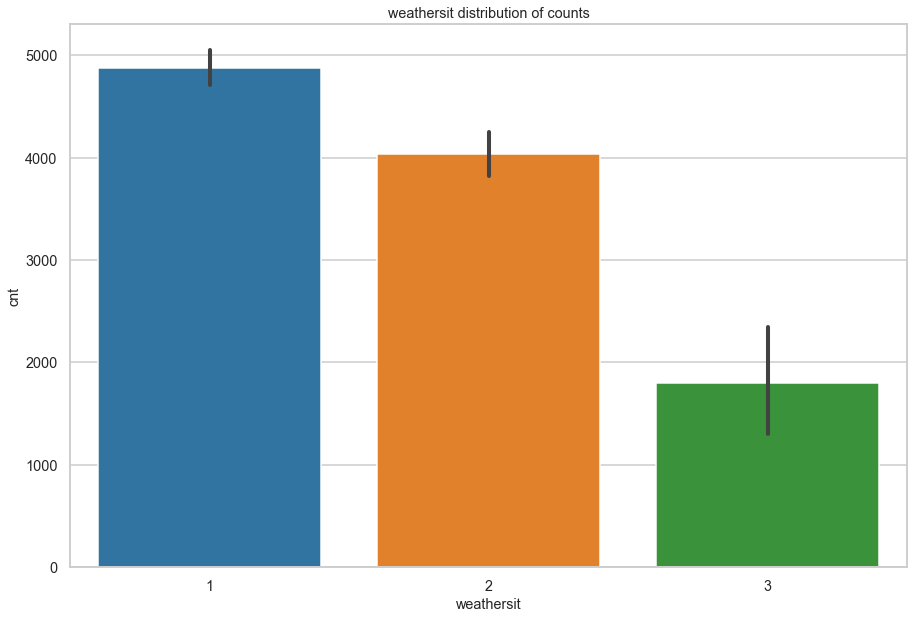

In [12]:
fig,ax = plt.subplots(figsize=(15, 10))
sn.barplot(data=train[['weathersit', 'cnt']], x="weathersit", y="cnt")
ax.set(title="weathersit distribution of counts")

#### 3.6 工作日和节假日的分布

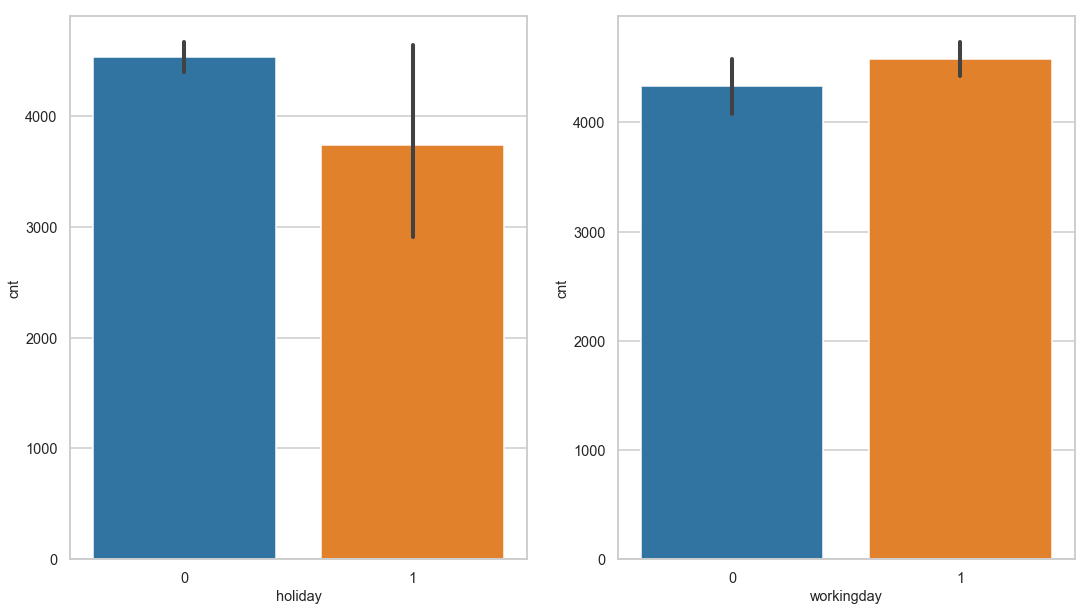

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(18, 10))
sn.barplot(data=train,x='holiday',y='cnt',ax=ax1)
sn.barplot(data=train,x='workingday',y='cnt',ax=ax2)

#### 3.7 一周中哪一天的分布

[Text(0.5, 1.0, 'weathersit distribution of counts')]

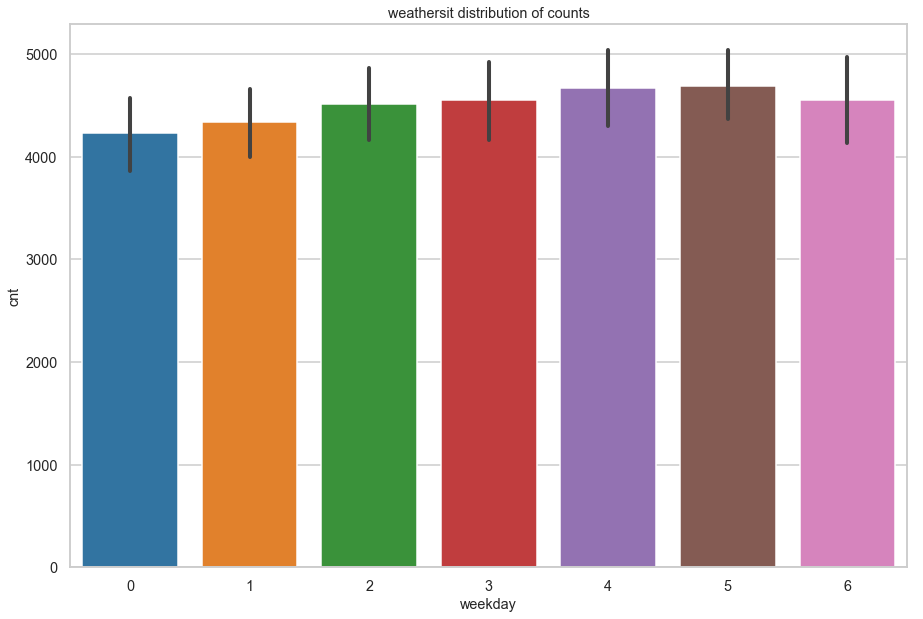

In [19]:
fig, ax = plt.subplots(figsize=(15, 10))
sn.barplot(data=train[['weekday', 'cnt']], x="weekday", y="cnt")
ax.set(title="weathersit distribution of counts")

#### 3.8 数值型特征和y之间的相关性

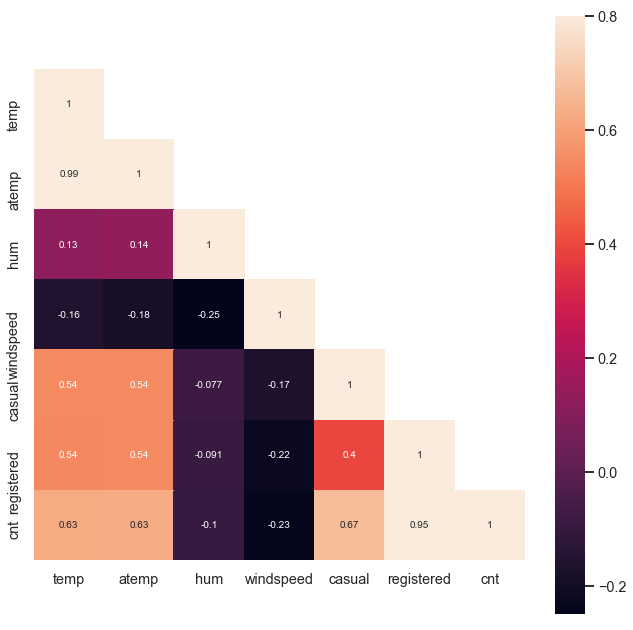

In [30]:
fig, ax = plt.subplots(figsize=(11, 11))
corrMatt = train[["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sn.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

体感温度和温度高度相关
目标cnt与温度正相关、湿度和风速负相关

## 2.特征工程

#### 根据前面对数据的分析，首先对类别型（季节/月份/星期/天气）特征进行独热编码

In [28]:
categ_feats = ['season', 'mnth', 'weekday', 'weathersit']

for categ in categ_feats:
    train[categ] = train[categ].astype('object')
    
X_train_categ = train[categ_feats]
X_train_categ = pd.get_dummies(X_train_categ)
print('X_train_categ: ', X_train_categ.shape)
X_train_categ.head()

X_train_categ:  (731, 26)


season_1  season_2  season_3  season_4  mnth_1  mnth_2  mnth_3  mnth_4  \
0         1         0         0         0       1       0       0       0   
1         1         0         0         0       1       0       0       0   
2         1         0         0         0       1       0       0       0   
3         1         0         0         0       1       0       0       0   
4         1         0         0         0       1       0       0       0   

   mnth_5  mnth_6  ...  weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  \
0       0       0  ...          0          0          0          0          0   
1       0       0  ...          1          0          0          0          0   
2       0       0  ...          0          1          0          0          0   
3       0       0  ...          0          0          1          0          0   
4       0       0  ...          0          0          0          1          0   

   weekday_5  weekday_6  weathersit_1  weathersit_2  weathersit_3  
0          0          1             0             1             0  
1          0          0             0             1             0  
2          0          0             1             0             0  
3          0          0             1             0             0  
4          0          0             1             0             0  

[5 rows x 26 columns]

#### 对数值型特征进行标准化/MinMaxScaler，去量纲

In [40]:
#"casual", "registered"不考虑
from sklearn.preprocessing import MinMaxScaler
mm_X = MinMaxScaler()
num_feats = ['temp', 'atemp', 'hum', 'windspeed']
tmp = mm_X.fit_transform(train[num_feats])
X_train_num = pd.DataFrame(data=tmp, columns=num_feats, index=train.index)
X_train_num.head()

temp     atemp       hum  windspeed
0  0.355170  0.373517  0.828620   0.284606
1  0.379232  0.360541  0.715771   0.466215
2  0.171000  0.144830  0.449638   0.465740
3  0.175530  0.174649  0.607131   0.284297
4  0.209120  0.197158  0.449313   0.339143

#### 将两类数据通过concat()进行合并

In [42]:
X_train = pd.concat([X_train_categ, X_train_num, train['holiday'], train['workingday']], axis=1, ignore_index=False)
print('X_train: ', X_train.shape)
X_train.head()

X_train:  (731, 32)


season_1  season_2  season_3  season_4  mnth_1  mnth_2  mnth_3  mnth_4  \
0         1         0         0         0       1       0       0       0   
1         1         0         0         0       1       0       0       0   
2         1         0         0         0       1       0       0       0   
3         1         0         0         0       1       0       0       0   
4         1         0         0         0       1       0       0       0   

   mnth_5  mnth_6  ...  weekday_6  weathersit_1  weathersit_2  weathersit_3  \
0       0       0  ...          1             0             1             0   
1       0       0  ...          0             0             1             0   
2       0       0  ...          0             1             0             0   
3       0       0  ...          0             1             0             0   
4       0       0  ...          0             1             0             0   

       temp     atemp       hum  windspeed  holiday  workingday  
0  0.355170  0.373517  0.828620   0.284606        0           0  
1  0.379232  0.360541  0.715771   0.466215        0           0  
2  0.171000  0.144830  0.449638   0.465740        0           1  
3  0.175530  0.174649  0.607131   0.284297        0           1  
4  0.209120  0.197158  0.449313   0.339143        0           1  

[5 rows x 32 columns]

In [43]:
FE_train = pd.concat([train['instant'], X_train, train['yr'], train['cnt']], axis = 1)
#FE_train.to_csv('FE_day.csv', index=False)
FE_train.head()

instant  season_1  season_2  season_3  season_4  mnth_1  mnth_2  mnth_3  \
0        1         1         0         0         0       1       0       0   
1        2         1         0         0         0       1       0       0   
2        3         1         0         0         0       1       0       0   
3        4         1         0         0         0       1       0       0   
4        5         1         0         0         0       1       0       0   

   mnth_4  mnth_5  ...  weathersit_2  weathersit_3      temp     atemp  \
0       0       0  ...             1             0  0.355170  0.373517   
1       0       0  ...             1             0  0.379232  0.360541   
2       0       0  ...             0             0  0.171000  0.144830   
3       0       0  ...             0             0  0.175530  0.174649   
4       0       0  ...             0             0  0.209120  0.197158   

        hum  windspeed  holiday  workingday  yr   cnt  
0  0.828620   0.284606        0           0   0   985  
1  0.715771   0.466215        0           0   0   801  
2  0.449638   0.465740        0           1   0  1349  
3  0.607131   0.284297        0           1   0  1562  
4  0.449313   0.339143        0           1   0  1600  

[5 rows x 35 columns]

In [44]:
FE_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 35 columns):
instant         731 non-null int64
season_1        731 non-null uint8
season_2        731 non-null uint8
season_3        731 non-null uint8
season_4        731 non-null uint8
mnth_1          731 non-null uint8
mnth_2          731 non-null uint8
mnth_3          731 non-null uint8
mnth_4          731 non-null uint8
mnth_5          731 non-null uint8
mnth_6          731 non-null uint8
mnth_7          731 non-null uint8
mnth_8          731 non-null uint8
mnth_9          731 non-null uint8
mnth_10         731 non-null uint8
mnth_11         731 non-null uint8
mnth_12         731 non-null uint8
weekday_0       731 non-null uint8
weekday_1       731 non-null uint8
weekday_2       731 non-null uint8
weekday_3       731 non-null uint8
weekday_4       731 non-null uint8
weekday_5       731 non-null uint8
weekday_6       731 non-null uint8
weathersit_1    731 non-null uint8
weathersit_2    731 

## 3.拆分数据集

In [45]:
#df = pd.read_csv('FE_day.csv')
# 显示数据的前五行
#df.head()

#### 从处理好的特征数据集中分离出特征集X和输出集y

In [47]:
y = FE_train['cnt']
X = FE_train.drop(['cnt'], axis=1)
# 保存拆分后的特征名称
x_feats_name = X.columns

#### 将数据分割为训练数据集，以及测试数据集

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)

## 4.训练模型

#### 4.1 训练最小二乘模型

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

lr_w = pd.DataFrame({'特征项':list(x_feats_name), '权重':list(lr.coef_.T)})
lr_w.sort_values(by=['权重'], ascending=False)

特征项           权重
33            yr  4550.708897
27          temp  2654.792827
13        mnth_9  1287.992360
28         atemp   995.293778
14       mnth_10   929.887649
24  weathersit_1   914.410909
4       season_4   830.579518
16       mnth_12   586.296405
12        mnth_8   517.803038
25  weathersit_2   409.589079
15       mnth_11   407.138803
23     weekday_6   238.417312
32    workingday   216.956549
10        mnth_6   189.797216
2       season_2    85.141889
22     weekday_5    77.516263
20     weekday_3    66.464787
21     weekday_4    43.650546
9         mnth_5     5.009200
0        instant    -6.919060
19     weekday_2   -31.943212
3       season_3  -130.807162
17     weekday_0  -191.612446
18     weekday_1  -202.493250
11        mnth_7  -203.137582
31       holiday  -263.761415
8         mnth_4  -485.714239
7         mnth_3  -541.439917
1       season_1  -784.914245
30     windspeed -1174.845790
6         mnth_2 -1207.111892
29           hum -1298.592138
26  weathersit_3 -1323.999988
5         mnth_1 -1486.521042

#### 4.1.1 评价最小二乘模型（RMSE & R2）

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
print('最小二乘模型在训练集上（Train）')
print('\t均方根误差为',math.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print('\tR2为',r2_score(y_train, y_train_pred_lr))

最小二乘模型在训练集上（Train）
	均方根误差为 742.7543512758712
	R2为 0.8516480637403496


In [59]:
print('最小二乘模型在测试集上（Test）')
print('\t均方根误差为',math.sqrt(mean_squared_error(y_test, y_test_pred_lr)))
print('\tR2为',r2_score(y_test, y_test_pred_lr))

最小二乘模型在测试集上（Test）
	均方根误差为 814.4749076863648
	R2为 0.8279474225980328


#### 4.2训练岭回归模型

In [66]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1, 10, 100]
ridge = RidgeCV(alphas=alphas)
ridge.fit(X_train, y_train)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

ridge_w = pd.DataFrame({'特征项':list(x_feats_name), 'ridge权重':list(ridge.coef_.T), 'lr权重':list(lr.coef_.T)})
ridge_w.sort_values(by=['ridge权重'], ascending=False)

特征项      ridge权重         lr权重
27          temp  1778.493414  2654.792827
28         atemp  1546.374034   995.293778
33            yr  1504.623924  4550.708897
24  weathersit_1   914.843092   914.410909
4       season_4   767.205317   830.579518
13        mnth_9   678.352931  1287.992360
25  weathersit_2   388.865215   409.589079
9         mnth_5   387.713628     5.009200
10        mnth_6   369.663154   189.797216
7         mnth_3   298.550050  -541.439917
23     weekday_6   227.515740   238.417312
32    workingday   212.558710   216.956549
12        mnth_8   205.686009   517.803038
2       season_2   110.998614    85.141889
8         mnth_4   106.306513  -485.714239
14       mnth_10    84.873020   929.887649
22     weekday_5    81.396550    77.516263
21     weekday_4    62.795850    43.650546
20     weekday_3    59.857933    66.464787
0        instant     1.417157    -6.919060
19     weekday_2   -34.140080   -31.943212
3       season_3   -91.388275  -130.807162
6         mnth_2  -143.125249 -1207.111892
17     weekday_0  -191.851510  -191.612446
5         mnth_1  -194.714350 -1486.521042
18     weekday_1  -205.574484  -202.493250
11        mnth_7  -242.548582  -203.137582
31       holiday  -248.222941  -263.761415
15       mnth_11  -725.828529   407.138803
1       season_1  -786.815656  -784.914245
16       mnth_12  -824.928596   586.296405
30     windspeed -1087.773198 -1174.845790
29           hum -1142.397276 -1298.592138
26  weathersit_3 -1303.708307 -1323.999988

#### 4.2.1 评价岭回归模型（RMSE & R2）

In [67]:
print('岭回归模型在训练集上（Train）')
print('\t均方根误差为',math.sqrt(mean_squared_error(y_train, y_train_pred_ridge)))
print('\tR2为',r2_score(y_train, y_train_pred_ridge))

岭回归模型在训练集上（Train）
	均方根误差为 747.4410131599844
	R2为 0.8497700029725632


In [68]:
print('岭回归模型在训练集上（Test）')
print('\t均方根误差为',math.sqrt(mean_squared_error(y_test, y_test_pred_ridge)))
print('\tR2为',r2_score(y_test, y_test_pred_ridge))

岭回归模型在训练集上（Test）
	均方根误差为 812.0412685702523
	R2为 0.8289740676744334


#### 4.3 训练Lasso模型

In [69]:
from sklearn.linear_model import LassoCV
alphas = [0.01, 0.1, 1, 10, 100]
lasso = LassoCV(alphas=alphas)
lasso.fit(X_train, y_train)

y_train_pred_lasso = lr.predict(X_train)
y_test_pred_lasso = lr.predict(X_test)

lasso_w = pd.DataFrame({'特征项':list(x_feats_name), 'lasso权重':list(lasso.coef_.T), 'ridge权重':list(ridge.coef_.T), 'lr权重':list(lr.coef_.T)})
lasso_w.sort_values(by=['lasso权重'], ascending=False)

D:\Develop Kit\Anaconda3_2019\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Develop Kit\Anaconda3_2019\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Develop Kit\Anaconda3_2019\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\Develop Kit\Anaconda3_2019\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You mi

特征项      lasso权重      ridge权重         lr权重
33            yr  3472.540499  1504.623924  4550.708897
27          temp  2609.975567  1778.493414  2654.792827
28         atemp  1031.599947  1546.374034   995.293778
13        mnth_9   924.519702   678.352931  1287.992360
4       season_4   759.982539   767.205317   830.579518
24  weathersit_1   499.555091   914.843092   914.410909
14       mnth_10   472.973717    84.873020   929.887649
12        mnth_8   244.553549   205.686009   517.803038
10        mnth_6    99.295175   369.663154   189.797216
22     weekday_5    28.801451    81.396550    77.516263
32    workingday    26.288122   212.558710   216.956549
20     weekday_3    17.401149    59.857933    66.464787
9         mnth_5     8.050132   387.713628     5.009200
2       season_2     5.856632   110.998614    85.141889
23     weekday_6     1.222883   227.515740   238.417312
25  weathersit_2     0.000000   388.865215   409.589079
21     weekday_4    -0.000000    62.795850    43.650546
0        instant    -3.972549     1.417157    -6.919060
16       mnth_12   -45.203860  -824.928596   586.296405
19     weekday_2   -79.989619   -34.140080   -31.943212
15       mnth_11  -141.660225  -725.828529   407.138803
3       season_3  -199.683869   -91.388275  -130.807162
18     weekday_1  -249.463453  -205.574484  -202.493250
7         mnth_3  -358.415759   298.550050  -541.439917
11        mnth_7  -386.246331  -242.548582  -203.137582
8         mnth_4  -392.886936   106.306513  -485.714239
17     weekday_0  -427.432845  -191.851510  -191.612446
31       holiday  -446.898429  -248.222941  -263.761415
1       season_1  -864.040406  -786.815656  -784.914245
6         mnth_2  -938.565103  -143.125249 -1207.111892
5         mnth_1 -1130.691382  -194.714350 -1486.521042
30     windspeed -1180.476252 -1087.773198 -1174.845790
29           hum -1317.015025 -1142.397276 -1298.592138
26  weathersit_3 -1730.522858 -1303.708307 -1323.999988

#### 4.3.1 评价Lasso模型（RMSE & R2）

In [70]:
print('Lasso模型在训练集上（Train）')
print('\t均方根误差为',math.sqrt(mean_squared_error(y_train, y_train_pred_lasso)))
print('\tR2为',r2_score(y_train, y_train_pred_lasso))

Lasso模型在训练集上（Train）
	均方根误差为 742.7543512758712
	R2为 0.8516480637403496


In [71]:
print('岭回归模型在训练集上（Test）')
print('\t均方根误差为',math.sqrt(mean_squared_error(y_test, y_test_pred_lasso)))
print('\tR2为',r2_score(y_test, y_test_pred_lasso))

岭回归模型在训练集上（Test）
	均方根误差为 814.4749076863648
	R2为 0.8279474225980328


通过比较上述三种模型得到的特征系数可以看出，岭回归和Lasso回归都能使得线性回归权重系数收缩，并且在Lasso中有的特征参数系数为0。回归系数都收缩是原因岭回归和Lasso都在最小二乘线性回归的基础上加了正则，限制了特征参数的取值，而Lasso中某些特征的系数为0，是因为对于L1正则，目标函数求的是次梯度，当梯度在次梯度集合内的时候，该维度的特征系数为0

通过观察模型评价指标可以看出，在训练集上评价最好的是岭回归模型，其次是Lasso模型，最后是最小二乘线性回归。原因是岭回归和Lasso都在最小二乘线性回归模型中加入了正则项，防止了模型过拟合的问题，所以效果要更好些。而在特征分析中，我们看到有很多特征相关性比较大，比如说温度与体感温度，在特征多，且特征间存在共线性关系时使用L2正则效果要更好，所以这这里岭回归模型比Lasso回归又好一点点